In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import datasets
from sklearn.linear_model import LinearRegression



In [12]:
# create LinearRegression object
class CustomLinearRegression:
    def fit(self, X, y, intercept=False):
        if intercept == False:
            ones = np.ones(len(X)).reshape(len(X),1) # column vector of ones
            X = np.concatenate((ones, X), axis=1)
        self.X = np.array(X)
        self.y = np.array(y)
        self.N, self.D = self.X.shape 

        # estimate parameters
        XtX = np.dot(self.X.T, self.X) 
        XtX_inverse = np.linalg.inv(XtX)
        Xty = np.dot(self.X.T,self.y)
        self.beta_hats = np.dot(XtX_inverse, Xty)

        # in-sample prediction
        self.y_hat = np.dot(self.X, self.beta_hats)
        # calculate the loss
        self.Loss = 0.5 * np.sum((self.y - self.y_hat)**2)
    
    def predict(self, X_test, intercept=True):
        # form predictions
        self.y_test_hat = np.dot(X_test, self.beta_hats)

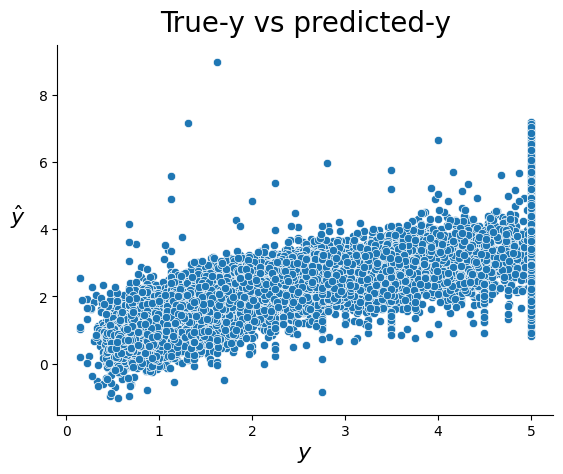

In [13]:
# load datasets
california_housing = datasets.fetch_california_housing()
# `X = boston["data"]` is assigning the feature data of the Boston dataset to the variable `X`. This
# data contains the independent variables or features used for prediction in a machine learning model.
X = california_housing["data"]
y = california_housing["target"]

model = CustomLinearRegression()
model.fit(X,y, intercept=False)

# visualise output
fig, ax = plt.subplots()
sns.scatterplot(x=model.y, y=model.y_hat)
ax.set_xlabel(r'$y$', size=16)
ax.set_ylabel(r'$\hat{y}$', rotation=0, size=16, labelpad=15)
ax.set_title("True-y vs predicted-y", size=20, pad=10)
sns.despine()#why

beta_1: 38.65
beta_2: 26.81
beta_3: 69.3
beta_4: 78.44
beta_5: 57.67


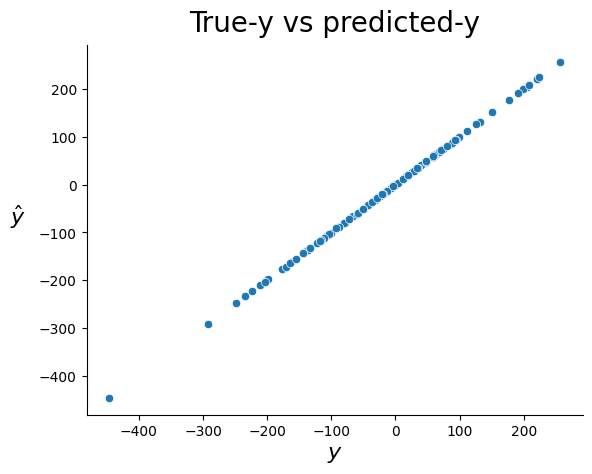

In [15]:
X,y = datasets.make_regression(n_samples=100, n_features=5, noise=0.1, random_state=12)

sklearn_model = LinearRegression()
sklearn_model.fit(X,y)

sklearn_predictions = sklearn_model.predict(X)

fig, ax = plt.subplots()
sns.scatterplot(x=y,y=sklearn_predictions)
ax.set_xlabel(r'$y$', size=16)
ax.set_ylabel(r'$\hat{y}$', rotation=0, size=16, labelpad=15)
ax.set_title("True-y vs predicted-y", size=20, pad=10)
sns.despine()#why

# check estimated parameters
beta_hats = sklearn_model.coef_
print("\n".join([f"beta_{i+1}: {round(beta_hats[i],2)}" for i in range(5)]))